<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/7/7-2/%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이번장 키워드
 - 심층 신경망
 - 렐루함수
 - 옵티마이저

이전 7-1에서는 한개의 층만을 사용했지만, 이번에는 인공신경망에 층을 여러개 추가하여 패션 MNIST 데이터셋을 분류하면서,<BR> 케라스로 심층 신경망 만들기

In [1]:
# 이번장에서 사용할 데이터 확인해 보기
from tensorflow import keras
(train_input,train_target),(test_input,test_target)= \
keras.datasets.fashion_mnist.load_data()

In [2]:
# 학습과 검증데이터로 변환

from sklearn.model_selection import train_test_split

# 올바른 확률적 경사하강법을 사용하기 위해 0,1 정규화를 통해 값을 고르게 분포시킴
train_scaled = train_input / 255.0
# 이후 전체 샘플의 평균을 내기 위해 2차원 배열의 각 샘플을 1차원 배열로 펼침
train_scaled = train_scaled.reshape(-1,28*28)

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2, random_state=42,) 

# 이번장에서 만들 신경망 모델의 스키마
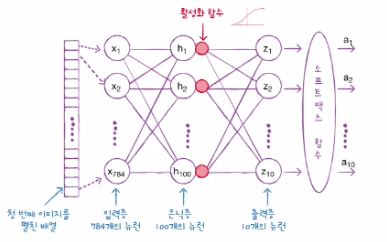
 - 앞장의 층과 다른 점은 입력층과 출력층(7-1) 사이에 밀집층이 추가된 것
 - 입력층과 출력층 사이에 모든 층을 은닉층 이라고 한다.
 - 은닉층에는 주황색 원의 활성함수가 표시되어 있음
  > 활성함수 : 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
 - 출력층의 활성함수는 시그모이드, 소프트맥스로 제한되어 있지만, 은닉층의 활성함수의 경우 비교적 자유롭게 사용할 수 있다.
 - 모든 은닉층은 하나씩 활성 함수를 사용한다.
 - 활성함수를 적용하는 이유
  > 1). ax4+2=b<br>
    2). bx3-5=c<br>   
    이 식은  ax4+2x3-5=c 로 b의 사용이 무의미해질 수 있다. 따라서 선형계산을 의도적으로 비틀어 주기 위해 활성함수를 사용, 다음층의 계산과 합쳐지지 않고 독립적으로 역활할 수 있다.

## 회귀일 경우 활성함수
분류의 경우 클래스별 확률을 출력하기 위해 활성함수를 사용한다.<br>
회귀의 경우에는 임의의 어떠한 숫자이기에 활성함수를 적용할 필요가 없이 선형방정식의 계산을<br> 그대로 출력함

In [3]:
# 활성함수 : 시그모이드
# 를 활용하여 출력층과 은닉층 만들기
# 앞장에서도 말했듯이 첫번째 층은 무조건 input_shape 매개변수로 입력의 크기를 지정해 주어야 한다.
dense1 = keras.layers.Dense(100,activation='sigmoid',name='1st',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax',name='2nd')

In [4]:
model = keras.Sequential([dense1,dense2]) # 심층 신경망 만들기

# summary 해석하기
 - Layer(type)
  > 1. Dense 층 선언 시 이름을 지정하여 사용할 수 있다.
 - Output Shape
  > 1. 첫번째 층의 출력크기는 (None, 100) 이다. 이는 샘플의 개수가 아직 정해져 있지 않기 때문이다. <br> 그 이유는 미니배치 경사하강법을 사용하기에 샘플에 개수를 고정하지 않고 어떤 배치크기에도 유연하게 <br>대응할 수 있도록 None으로 설정한다.
  2. 두번째 100의 경우 뉴런의 개수와 같다. 즉 샘플마다 784(28x28) 개의 특성을 100개로 압축
 - Param # 
  > 1. Dense 층의 토탈 모델 파라미터 개수 출력
  2. 첫번째 층의 경우 784x100(뉴런 개수) +100(절편의 개수) = 78500
  3. 2번째 Dense 층의 경우 앞선 뉴런의 개수100개(특성) x 10 + 10(절편의 개수) = 1010개 이다.
 - Total Params -> 총 파라미터의 개수
 - Trainable Params -> 총 학습한 파라미터 수
 - Non-trainable params -> 간혹 학습되지 않은 파라미터의 개수 출력(경사하강법 예시)

In [5]:
# 학습시킨 케라스 모델의 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st (Dense)                 (None, 100)               78500     
                                                                 
 2nd (Dense)                 (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 층을 추가하는 다른방법 (앞선 방법보다 좀더 깔끔하게)

model = keras.Sequential([
                          # Dense 층의 이름은 반드시 영어로 해야한다
                          keras.layers.Dense(100,activation='sigmoid',name='hidden',input_shape=(784,)),
                          keras.layers.Dense(10,activation='softmax',name='output')
# 전체 모델의 이름은 한글로 해도 상관 없음                     
],name='패션 MNIST 모델')

In [7]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 층을 추가하는 다른 방법
# 실제로 많이 사용하는 방법인 .add를 사용하는 방법
# 이렇게 하여 동적으로 층을 추가할 수 있다.
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',name='dense1',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax',name='dense2'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 훈련하기
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target,epochs=5) 

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5611 - accuracy: 0.8093
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4080 - accuracy: 0.8530
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3730 - accuracy: 0.8654
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3516 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3353 - accuracy: 0.8794


# 렐루함수
 - 초기 은닉층에 사용된 활성함수는 시그모이드 함수
 - 하지만 시그모이드 함수의 단점으로 인해 정확한 값의 판별이 어려웠음
  > 시그모이드는 값이 +.. -.. 로 갈수록 1 , 0 으로 수렴하기에 정확한 값의 추정이 어려움<br>
  더욱이 은닉층이 더 많을수록 이런 정확도는 더욱 떨어짐
 - 따라서 이러한 문제점을 해결하고자 ReLU 함수를 활성함수로 사용함

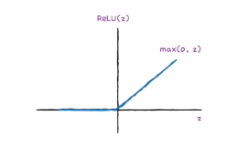
 - ReLU 함수의 특징
  > 1. 이미지를 처리할 때 좋은 성능을 냄
  2. 음수일 경우 0을, 양수일 경우(A) A를 출력함